<a href="https://colab.research.google.com/github/s-choung/Simulation_tutorials/blob/main/handson_DFT_setup_and_bulk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get update
!apt-get install -y python3-dev libopenblas-dev liblapack-dev libfftw3-dev libxc-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,150 kB]
Get:14 http://security.ubuntu.co

In [3]:
!pip install ase
!pip install gpaw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gpaw: filename=gpaw-24.6.0-cp310-cp310-linux_x86_64.whl size=2787035 sha256=9f468eeadcd9c790d5f6e3036d77ba6ddefc4a823f14085e55c45ffec1e5749a
  Stored in directory: /root/.cache/pip/wheels/13/03/25/dc7e7191efd7e13c67490ed6c1de03bcc1674874df1dc6e118
Successfully built gpaw


In [4]:
!gpaw test

 -------------------------------------------------------------------------------------------------
| python-3.10.12    /usr/bin/python3                                                              |
| gpaw-24.6.0       /usr/local/lib/python3.10/dist-packages/gpaw/                                 |
| ase-3.23.0        /usr/local/lib/python3.10/dist-packages/ase/                                  |
| numpy-1.26.4      /usr/local/lib/python3.10/dist-packages/numpy/                                |
| scipy-1.13.1      /usr/local/lib/python3.10/dist-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw             /usr/local/lib/python3.10/dist-packages/_gpaw.cpython-310-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

In [5]:
!gpaw install-data ./

Available setups and pseudopotentials
  [*] https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-24.1.0.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.20000.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.11271.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.9672.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.8.7929.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.6.6300.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.5.3574.tar.gz

Selected gpaw-setups-24.1.0.tar.gz.  Downloading...
Extracting tarball into ./
Setups installed into /content/gpaw-setups-24.1.0.
Register this setup path in /root/.gpaw/rc.py? [y/n] y
Setup path registered in /root/.gpaw/rc.py.
Current GPAW setup paths in order of search priority:
   1. /content/gpaw-setups-24.1.0
Installation complete.


In [6]:
import os
import gzip
import shutil

# Define the path to the setup files
setup_path = '/content/gpaw-setups-24.1.0'

# Uncompress all .gz files in the setup directory
for filename in os.listdir(setup_path):
    if filename.endswith('.gz'):
        filepath = os.path.join(setup_path, filename)
        with gzip.open(filepath, 'rb') as f_in:
            with open(filepath[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

# List the files after uncompressing to ensure the process completed successfully
print("Files in setup directory after uncompressing:", os.listdir(setup_path))

# Set the GPAW_SETUP_PATH environment variable
os.environ['GPAW_SETUP_PATH'] = setup_path

# Verify the environment variable
print("GPAW_SETUP_PATH:", os.environ['GPAW_SETUP_PATH'])



Files in setup directory after uncompressing: ['In.RPBE', 'Cl.RPBE.gz', 'V.5.LDA.gz', 'Cs.PBE.gz', 'Ni.LDA', 'Ir.PBE.gz', 'Ta.5.dzp.basis.gz', 'Rn.GLLBSC.gz', 'Tl.LDA.gz', 'F.revPBE', 'Cs.GLLBSC', 'Mn.7.LDA.gz', 'I.LDA', 'H.LDA.gz', 'Ar.dzp.basis', 'N.GLLBSC', 'Ta.LDA.gz', 'Ca.GLLBSC', 'Pt.10.RPBE.gz', 'Mo.6.RPBE', 'Mg.dzp.basis.gz', 'P.RPBE.gz', 'Co.LDA.gz', 'Ba.GLLBSC', 'Pd.10.dzp.basis', 'N.LDA', 'Ca.GLLBSC.gz', 'Mg.GLLBSC.gz', 'He.dzp.basis', 'Na.PBE.gz', 'Mo.revPBE', 'Sb.RPBE.gz', 'Tl.RPBE.gz', 'Zn.dzp.basis', 'V.5.revPBE', 'Sr.dzp.basis', 'Br.PBE.gz', 'W.GLLBSC', 'Ni.10.PBE.gz', 'Pd.PBE', 'Si.revPBE', 'Pb.PBE', 'Rb.RPBE.gz', 'Sb.LDA', 'As.LDA.gz', 'Os.RPBE', 'Al.dzp.basis', 'Li.RPBE.gz', 'Os.8.PBE.gz', 'Kr.PBE.gz', 'W.revPBE', 'Sb.revPBE', 'O.RPBE', 'Mg.dzp.basis', 'Se.GLLBSC.gz', 'Ba.dzp.basis', 'Bi.dzp.basis', 'Si.dzp.basis.gz', 'V.LDA', 'Zr.dzp.basis', 'Fe.revPBE.gz', 'Cl.PBE.gz', 'Zr.LDA', 'Pt.PBE', 'S.GLLBSC.gz', 'Sb.GLLBSC', 'Ni.PBE.gz', 'Cl.RPBE', 'Fe.RPBE.gz', 'V.5.revPBE

In [12]:
# Import ASE and GPAW and run your calculation
from ase import Atoms
from gpaw import GPAW

# Define the atomic structure
d = 0.74
a = 6.0

atoms = Atoms('H2',
              positions=[(0, 0, 0),
                         (0, 0, d)],
              cell=(a, a, a))
atoms.center()

# Initialize GPAW calculator without specifying the 'setups' parameter
calc = GPAW(mode='fd', nbands=2, txt='h2.txt')
atoms.calc = calc

# Run the calculation
print("Forces on atoms:", atoms.get_forces())
print("Energies on atoms:", atoms.get_total_energy())


Forces on atoms: [[ 0.          0.         -0.84512566]
 [ 0.          0.          0.84512566]]
['__add__', '__ase_optimizable__', '__class__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_ase_handles_dynamic_stress', '_calc', '_celldisp', '_cellobj', '_centering_as_array', '_constraints', '_del_constraints', '_get_atomic_numbers', '_get_constraints', '_get_positions', '_masked_rotate', '_pbc', '_set_positions', 'append', 'arrays', 'ase_objtype', 'calc', 'cell', 'center', 'constraints', 'copy', 'edit', 'euler_rotate', 'extend', 'fromdict', 'get_all_distances', 'get_angle', 'get_angles', 'get_angular_momentum', 'get_a

In [13]:
"""Bulk Al(fcc) test"""
from ase import Atoms
from ase.visualize import view
from gpaw import GPAW, PW

name = 'Al-fcc'
a = 4.05  # fcc lattice parameter
b = a / 2
bulk = Atoms('Al',
             cell=[[0, b, b],
                   [b, 0, b],
                   [b, b, 0]],
             pbc=True)

k = 4
calc = GPAW(mode=PW(300),       # cutoff
            kpts=(k, k, k),     # k-points
            txt=name + '.txt')  # output file

bulk.calc = calc

energy = bulk.get_potential_energy()
calc.write(name + '.gpw')
print('Energy:', energy, 'eV')

Energy: -4.122151616078063 eV


<ipython-input-28-aee59351b86d>:51: DeprecationWarning: Please use atoms.calc = None
  del bulk.calc  # Clean up


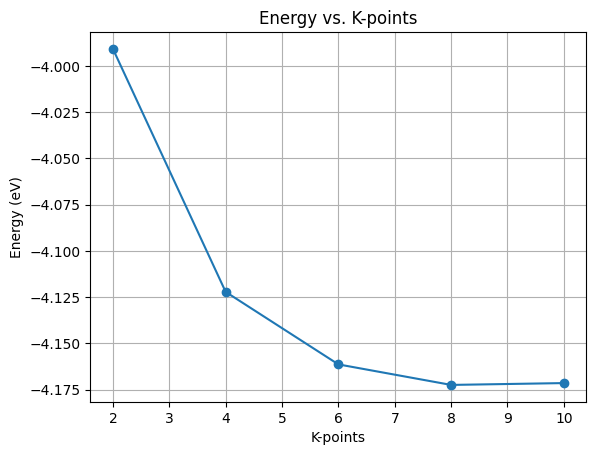

   K-points  Time (s)
0         2  0.691473
1         4  1.537261
2         6  4.058681
3         8  4.913203
4        10  8.829082


<ipython-input-28-aee59351b86d>:106: DeprecationWarning: Please use atoms.calc = None
  del bulk.calc  # Clean up


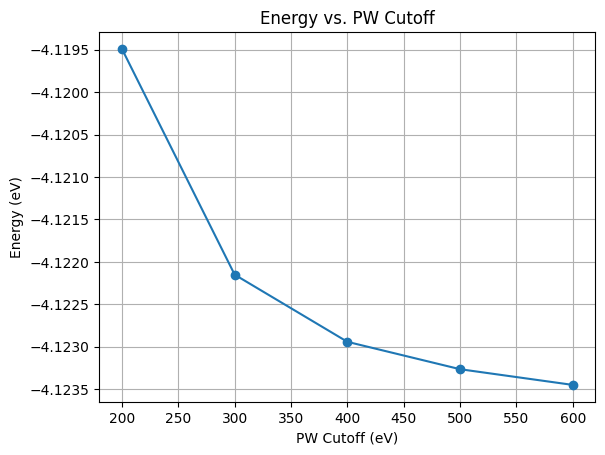

   PW Cutoff (eV)  Time (s)
0           200.0  1.656268
1           300.0  1.548197
2           400.0  1.801280
3           500.0  1.863097
4           600.0  2.384384


In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ase import Atoms
from gpaw import GPAW, PW

# Testing k-points
k_values = [2, 4, 6, 8, 10]  # Different k-point grids to test
energies_k = []
times_k = []

a = 4.05  # fcc lattice parameter
b = a / 2

# Loop over different k-points
for k in k_values:
    # Define the bulk FCC structure
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)

    # Set up the GPAW calculator
    calc = GPAW(mode=PW(300),  # Fixed cutoff energy
                kpts=(k, k, k),  # Varying k-points
                txt=f'Al-fcc-k{k}.txt')

    # Attach the calculator to the bulk structure
    bulk.calc = calc

    # Start timing
    start_time = time.time()

    # Calculate the potential energy
    energy = bulk.get_potential_energy()

    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Store the energy and time
    energies_k.append(energy)
    times_k.append(elapsed_time)

    # Save the calculator state
    calc.write(f'Al-fcc-k{k}.gpw')
    del bulk.calc  # Clean up

# Plot k-points vs. energy
plt.figure()
plt.plot(k_values, energies_k, marker='o', linestyle='-')
plt.xlabel('K-points')
plt.ylabel('Energy (eV)')
plt.title('Energy vs. K-points')
plt.grid()
plt.show()

# Create a DataFrame for the time taken for different k-points
time_k_table = pd.DataFrame({'K-points': k_values, 'Time (s)': times_k})
print(time_k_table)

# Testing plane-wave cutoff energies
pw_values = np.linspace(200, 600, 5)  # Different PW values to test
energies_pw = []
times_pw = []

# Loop over different PW cutoff energies
for pw in pw_values:
    # Define the bulk FCC structure
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)

    # Set up the GPAW calculator
    calc = GPAW(mode=PW(pw),  # Varying cutoff energy
                kpts=(4, 4, 4),  # Fixed k-points
                txt=f'Al-fcc-pw{pw:.0f}.txt')

    # Attach the calculator to the bulk structure
    bulk.calc = calc

    # Start timing
    start_time = time.time()

    # Calculate the potential energy
    energy = bulk.get_potential_energy()

    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Store the energy and time
    energies_pw.append(energy)
    times_pw.append(elapsed_time)

    # Save the calculator state
    calc.write(f'Al-fcc-pw{pw:.0f}.gpw')
    del bulk.calc  # Clean up

# Plot PW values vs. energy
plt.figure()
plt.plot(pw_values, energies_pw, marker='o', linestyle='-')
plt.xlabel('PW Cutoff (eV)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs. PW Cutoff')
plt.grid()
plt.show()

# Create a DataFrame for the time taken for different PW values
time_pw_table = pd.DataFrame({'PW Cutoff (eV)': pw_values, 'Time (s)': times_pw})
print(time_pw_table)


<ipython-input-20-4014160ee9d1>:40: DeprecationWarning: Please use atoms.calc = None
  del bulk.calc  # Free memory


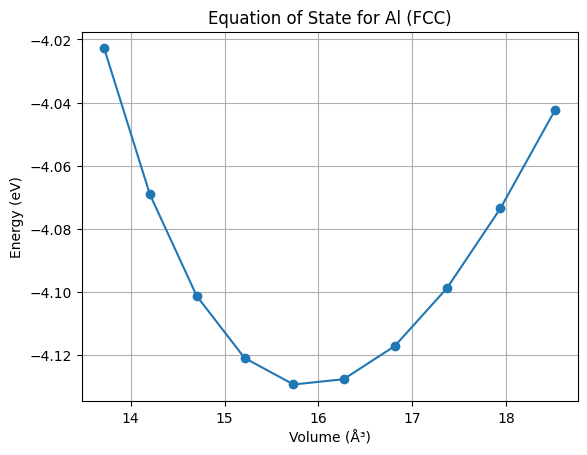

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from gpaw import GPAW, PW

# Set up values for lattice parameter 'a'
a_values = np.linspace(3.8, 4.2, 10)  # Adjust the range and number of points as needed
energies = []
volumes = []

# Loop over each lattice parameter to calculate energy
for a in a_values:
    b = a / 2
    # Define the bulk structure
    bulk = Atoms('Al',
                 cell=[[0, b, b],
                       [b, 0, b],
                       [b, b, 0]],
                 pbc=True)

    # Set up the calculator
    k = 4
    calc = GPAW(mode=PW(300),       # Plane-wave cutoff
                kpts=(k, k, k),     # k-points grid
                txt=f'Al-fcc-a{a:.2f}.txt')  # Output file with varying name

    # Attach the calculator to the bulk structure
    bulk.calc = calc

    # Calculate the potential energy
    energy = bulk.get_potential_energy()
    volume = bulk.get_volume()

    # Store the energy and volume
    energies.append(energy)
    volumes.append(volume)

    # Clean up the calculator
    calc.write(f'Al-fcc-a{a:.2f}.gpw')
    del bulk.calc  # Free memory

# Plot EOS: Energy vs. Volume
plt.figure()
plt.plot(volumes, energies, marker='o', linestyle='-')
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Equation of State for Al (FCC)')
plt.grid()
plt.show()


In [29]:
!sudo apt-get install povray  ## visulization program

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-povray libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  fonts-povray libsdl1.2debian povray povray-includes
0 upgraded, 4 newly installed, 0 to remove and 53 not upgraded.
Need to get 1,792 kB of archives.
After this operation, 5,199 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-povray all 1:3.7.0.10-1 [70.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libsdl1.2debian amd64 1.2.15+dfsg2-6 [177 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 povray amd64 1:3.7.0.10-1 [1,312 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 povray-includes all 1:3.7.0.10-1 [233 kB]
Fetched 1,792 kB in 0s (4,820 kB/s)
debconf: unable to initialize frontend: Dialo

slab

In [33]:
import os
import shutil
from ase.io import write  # Import the write function from ASE
from PIL import Image
from IPython.display import display  # Import display for Jupyter Notebooks


def visual(structure, max_size=(100, 100), stretch_y=1.0, rotation='15z,-90x', png_save_path='./'):
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = './temp.png'
    img = Image.open(image_path)

    # Calculate new size with stretch factor
    new_size = (max_size[0], int(max_size[1] * stretch_y))
    img = img.resize(new_size, Image.LANCZOS)
    display(img)

    # Move files to output directory
    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'

    # Ensure destination directory exists
    os.makedirs(destination, exist_ok=True)

    for file in files:
        # Remove the file in the destination directory if it exists
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        if file == './temp.png':
            new_file_name = png_save_path + f'temp.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))


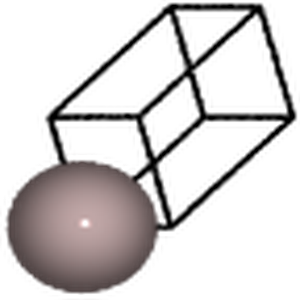

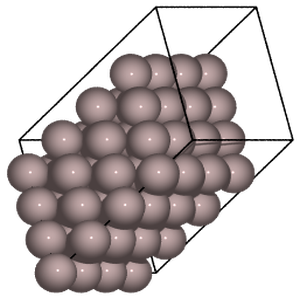

In [36]:
visual(bulk,(300,300))
repeat=(4,4,4)
visual(bulk*repeat,(300,300))

In [26]:
import time  # Import the time module
from ase.build import fcc100
from gpaw import GPAW

# Initialize the parameters
k = 1
N = 4
size = 2
# Create the slab
fcc = fcc100('Al', (size, size, N), a=4, vacuum=7.5)
fcc.center(axis=2)

# Set up the GPAW calculator
calc = GPAW(mode='fd',
            nbands=N * 3 * size**2,
            kpts=(k, k, 1),
            h=0.25,
            txt='slab-%d.txt' % N)

# Attach the calculator to the slab
fcc.calc = calc

# Start timing
start_time = time.time()

# Run the calculation to get the potential energy
e = fcc.get_potential_energy()

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Save the calculator state
calc.write('slab-%d.gpw' % N)

# Print the energy and the elapsed time
print(f'Potential Energy: {e} eV')
print(f'Time taken: {elapsed_time:.2f} seconds')


Potential Energy: -62.569171991901385 eV
Time taken: 34.33 seconds


In [37]:
from ase.io.opls import OPLSff, OPLSStructure
s = OPLSStructure('Spiro_ext.xyz')
opls = OPLSff('ff.par')
opls.write_lammps(s, prefix='lmp')

FileNotFoundError: [Errno 2] No such file or directory: 'Spiro_ext.xyz'